# Visión por Computadora I #

## CEIA 21Co2025 ##

## TP1 - Parte 2 ##

José Luis Diaz (diazjoseluis@gmail.com)

Ricardo Silvera (rsilvera@thalu.com.ar)

José Aviani (jose.aviani@gmail.com)


---

Importar librerias:

In [1]:
%pip install cv
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Leer imágenes:

In [3]:
def read_gray(path: str) -> np.ndarray:
    """Lee imagen en escala de grises"""
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo leer {path}")
    return img

img1 = read_gray("./data/img1_tp.png")
img2 = read_gray("./data/img2_tp.png")

Visualizar imágenes:

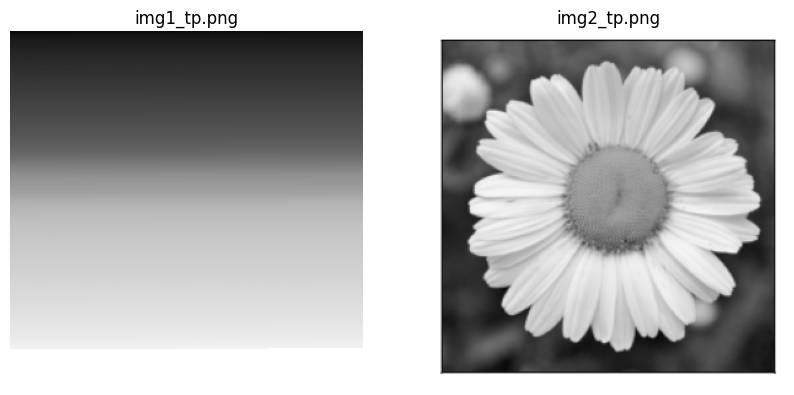

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title("img1_tp.png")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.title("img2_tp.png")
plt.axis("off")

plt.show()

Calcular histográmas y compararlos para diferentes *bins*:

In [5]:
def analizar_imagenes(bins):

  # Calcular histogramas

  def compute_histogram(img, bins):
      hist, edges = np.histogram(img.ravel(), bins=bins, range=(0,256))
      hist = hist.astype(np.float32)
      hist /= hist.sum()
      centers = (edges[:-1] + edges[1:]) / 2
      return centers, hist
  
  print("-" * 150)

  c1, h1 = compute_histogram(img1, bins)
  c2, h2 = compute_histogram(img2, bins)

  # Visualizar histogramas
  plt.figure(figsize=(12,5))

  plt.subplot(1,2,1)
  plt.bar(c1, h1, width=(256/32), color="gray")
  plt.title(f"Histograma - img1_tp.png - Bins: {bins}")
  plt.xlabel("Intensidad (0-255)")
  plt.ylabel("Frecuencia normalizada")

  plt.subplot(1,2,2)
  plt.bar(c2, h2, width=(256/32), color="gray")
  plt.title(f"Histograma - img2_tp.png - Bins: {bins}")
  plt.xlabel("Intensidad (0-255)")
  plt.ylabel("Frecuencia normalizada")

  plt.tight_layout()
  plt.show()


  # Comparación de histográmas
  plt.figure(figsize=(7,5))
  plt.plot(c1, h1, label="Imagen 1", color="blue")
  plt.plot(c2, h2, label="Imagen 2", color="red", linestyle="--")
  plt.title(f"Comparación de histogramas - Bins: {bins}")
  plt.xlabel("Intensidad (0-255)")
  plt.ylabel("Frecuencia normalizada")
  plt.legend()
  plt.show()

  print("-" * 150)

------------------------------------------------------------------------------------------------------------------------------------------------------


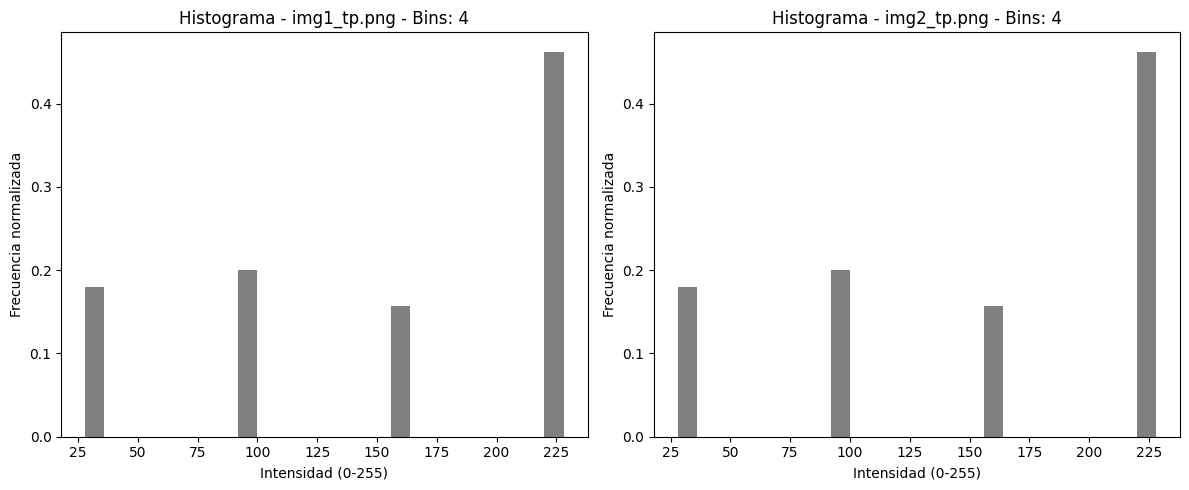

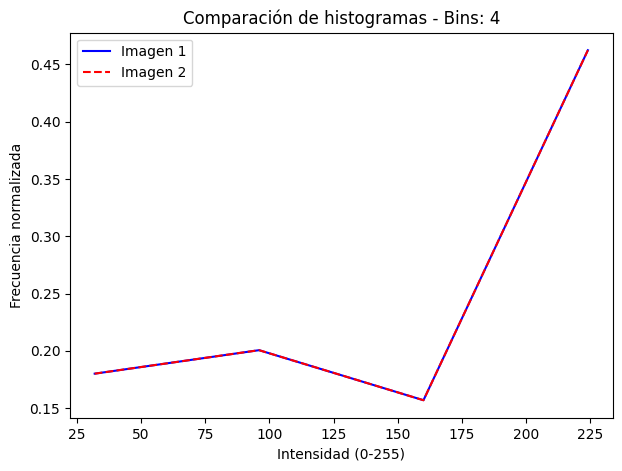

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


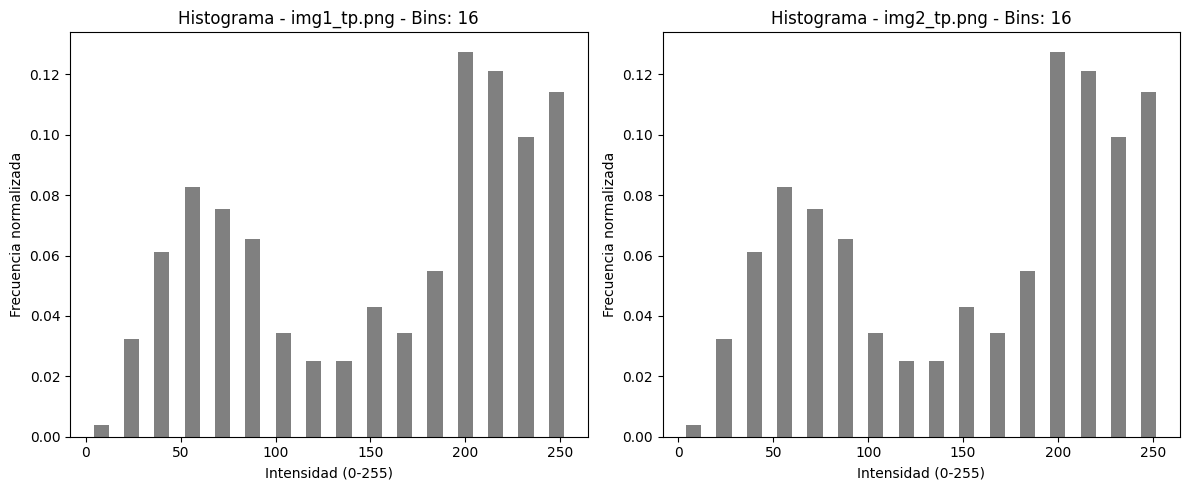

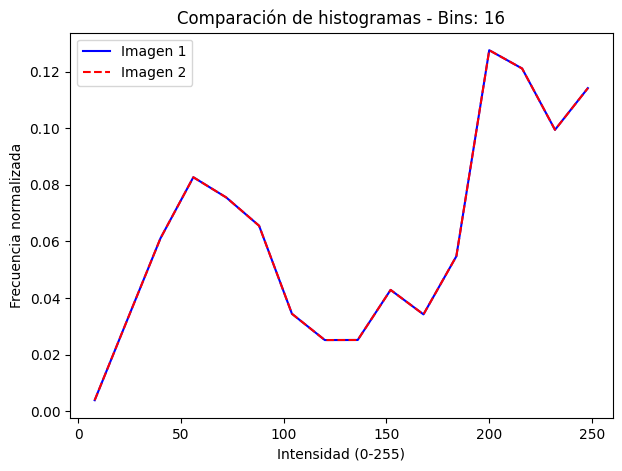

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


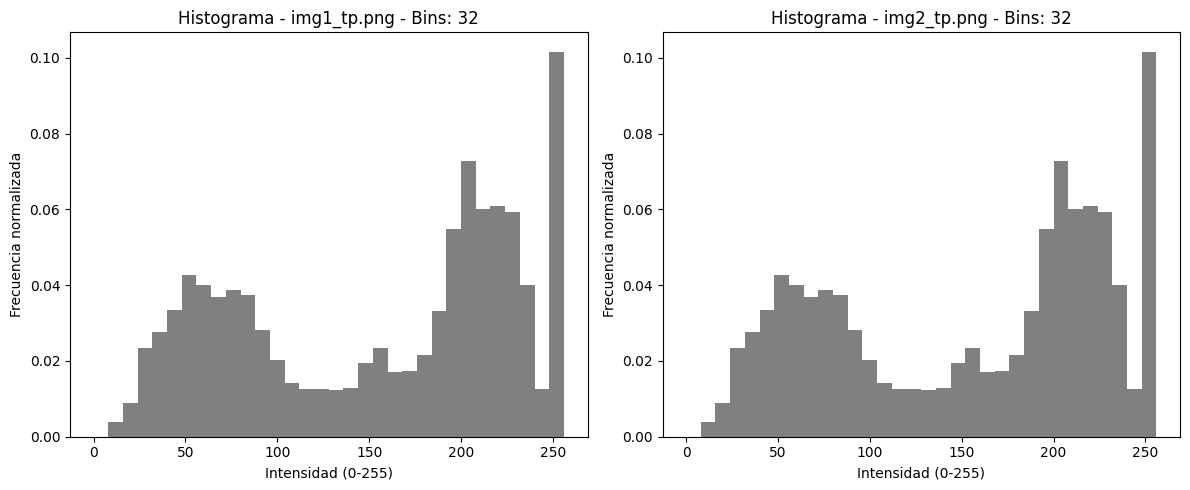

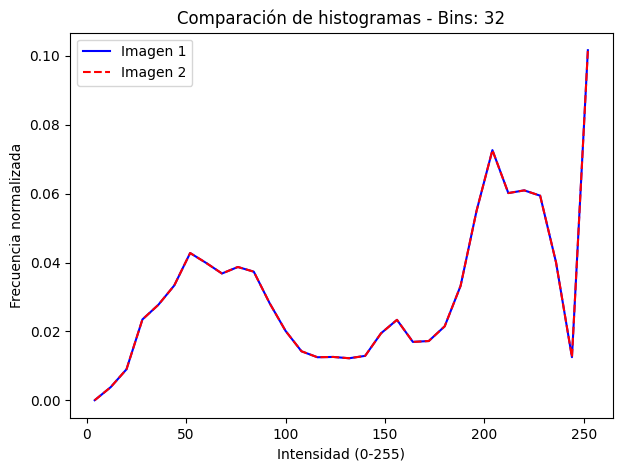

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


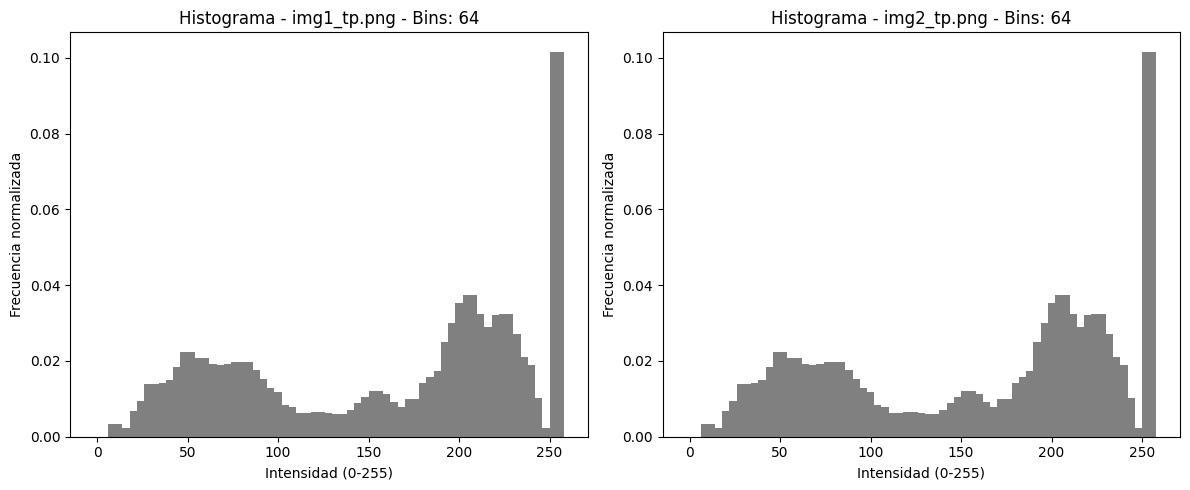

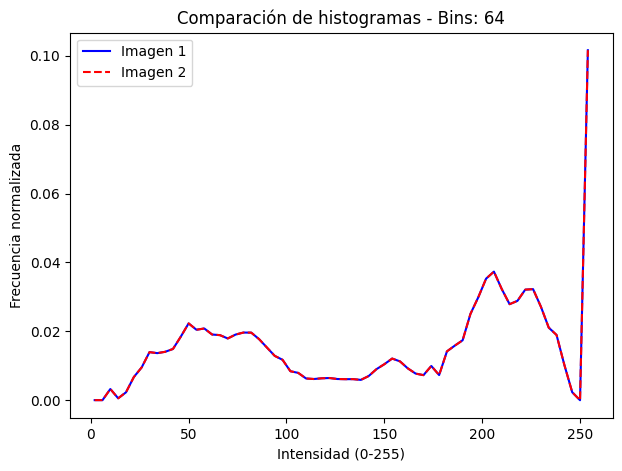

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


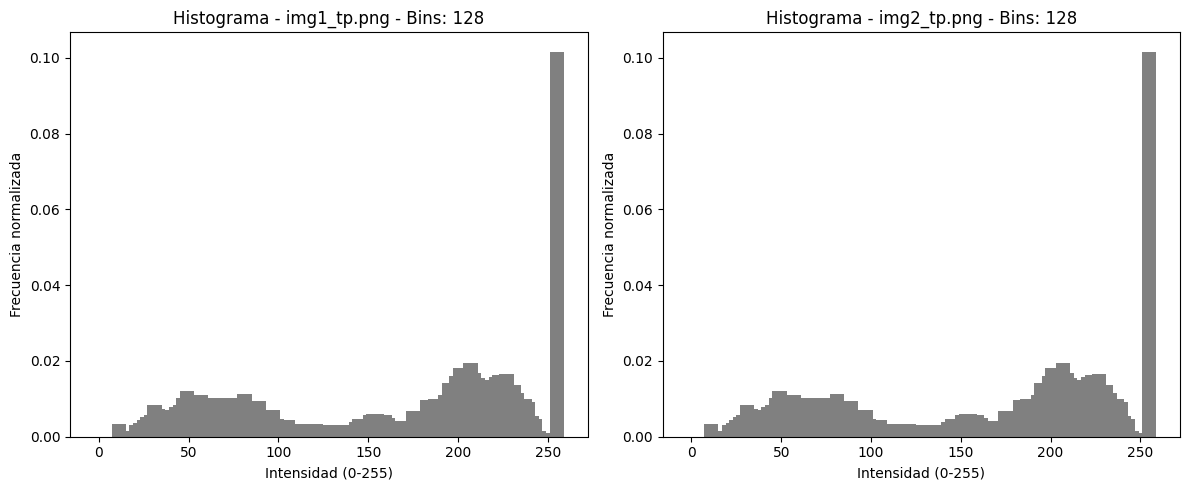

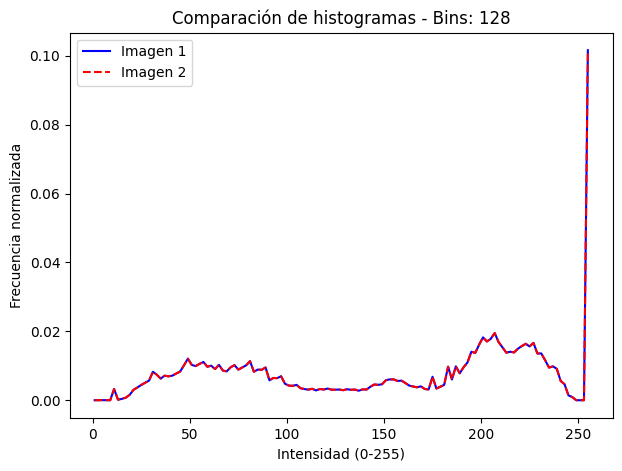

------------------------------------------------------------------------------------------------------------------------------------------------------


In [6]:
arr_bins = [4, 16, 32, 64, 128]

for bins in arr_bins:
    analizar_imagenes(bins)

### Conclusiones: ###

Para los diferentes bins utilizados el resultado es el mismo: el histograma de ambas imágenes es exactamente igual. Esto se debe a que:

* Ambas imágenes cubren el mismo rango de intensidades (0–255).

* La distribución de píxeles por nivel de gris termina siendo equivalente a normalizar.

* Esto sucede porque el histograma ignora la disposición espacial de los píxeles: ambas imágenes tienen la misma cantidad total de grises, aunque la organización sea distinta.

<br />

Un histograma global de intensidades no es suficiente como *feature* para clasificación/detección de objetos reales, porque:

* Pierde toda la información espacial.

* Es muy sensible a cambios de iluminación y contraste.

<br />

Un histograma sí puede ser útil para tareas muy simples donde lo que importa es el brillo global o el contraste, por ejemplo:

* Clasificar imágenes nocturnas vs diurnas.

* Detectar radiografías sobreexpuestas.

* Distinguir materiales con tonalidades muy distintas.

También cuando se usan variantes más avanzadas:

* Histogramas de color en RGB/HSV para distinguir.

* Histogramas locales por bloques (spatial pyramids), que sí capturan diferencias entre un gradiente y una flor.

* Histogramas de gradientes (HOG) que ya incorporan información espacial de bordes y texturas.

---